# Project - EDA with Pandas Using the Boston Housing Data

## Introduction

In this section you've learned a lot about importing, cleaning up, analysing (using descriptive statistics) and visualizing data. In this more free form project you'll get a chance to practice all of these skills with the Boston Housing data set,  which contains housing values in suburbs of Boston. The Boston Housing Data is commonly used by aspiring data scientists.  

## Objectives
You will be able to:
* Show mastery of the content covered in this section

# Goals

Use your data munging and visualization skills to conduct an exploratory analysis of the dataset below. At minimum, this should include:

* Loading the data (which is stored in the file train.csv)
* Use built-in python functions to explore measures of centrality and dispersion for at least 3 variables
* Create *meaningful* subsets of the data using selection operations using `.loc`, `.iloc` or related operations. Explain why you used the chosen subsets and do this for 3 possible 2-way splits. State how you think the 2 measures of centrality and/or dispersion might be different for each subset of the data. Examples of potential splits:
    - Create a 2 new dataframes based on your existing data, where one contains all the properties next to the Charles river, and the other one contains properties that aren't.
    - Create 2 new datagrames based on a certain split for crime rate.
* Next, use histograms and scatterplots to see whether you observe differences for the subsets of the data. Make sure to use subplots so it is easy to compare the relationships.

# Variable Descriptions

This data frame contains the following columns:

#### crim  
per capita crime rate by town.

#### zn  
proportion of residential land zoned for lots over 25,000 sq.ft.

#### indus  
proportion of non-retail business acres per town.

#### chas  
Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).

#### nox  
nitrogen oxides concentration (parts per 10 million).

#### rm  
average number of rooms per dwelling.

#### age  
proportion of owner-occupied units built prior to 1940.

#### dis  
weighted mean of distances to five Boston employment centres.

#### rad  
index of accessibility to radial highways.

#### tax  
full-value property-tax rate per $10,000.

#### ptratio  
pupil-teacher ratio by town.

#### black  
1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.

#### lstat  
lower status of the population (percent).

#### medv  
median value of owner-occupied homes in $10000s.
  
  
  
Source
Harrison, D. and Rubinfeld, D.L. (1978) Hedonic prices and the demand for clean air. J. Environ. Economics and Management 5, 81–102.

Belsley D.A., Kuh, E. and Welsch, R.E. (1980) Regression Diagnostics. Identifying Influential Data and Sources of Collinearity. New York: Wiley.

## Summary

Congratulations, you've completed your first "freeform" exploratory data analysis of a popular data set!

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
bhd=pd.read_csv('train.csv')
bhd.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


In [12]:
bhd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 15 columns):
ID         333 non-null int64
crim       333 non-null float64
zn         333 non-null float64
indus      333 non-null float64
chas       333 non-null int64
nox        333 non-null float64
rm         333 non-null float64
age        333 non-null float64
dis        333 non-null float64
rad        333 non-null int64
tax        333 non-null int64
ptratio    333 non-null float64
black      333 non-null float64
lstat      333 non-null float64
medv       333 non-null float64
dtypes: float64(11), int64(4)
memory usage: 39.1 KB


all columns contain numerical values, no missing data, note: 'chas' is charles river proximity boolean stand-in

In [5]:
bhd.describe()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000
mean,250.951952,3.360341,10.689189,11.293483,0.060060,0.557144,6.265619,68.226426,3.709934,9.633634,409.279279,18.448048,359.466096,12.515435,22.768769
std,147.859438,7.352272,22.674762,6.998123,0.237956,0.114955,0.703952,28.133344,1.981123,8.742174,170.841988,2.151821,86.584567,7.067781,9.173468
min,1.000000,0.006320,0.000000,0.740000,0.000000,0.385000,3.561000,6.000000,1.129600,1.000000,188.000000,12.600000,3.500000,1.730000,5.000000
25%,123.000000,0.078960,0.000000,5.130000,0.000000,0.453000,5.884000,45.400000,2.122400,4.000000,279.000000,17.400000,376.730000,7.180000,17.400000
50%,244.000000,0.261690,0.000000,9.900000,0.000000,0.538000,6.202000,76.700000,3.092300,5.000000,330.000000,19.000000,392.050000,10.970000,21.600000
75%,377.000000,3.678220,12.500000,18.100000,0.000000,0.631000,6.595000,93.800000,5.116700,24.000000,666.000000,20.200000,396.240000,16.420000,25.000000
max,506.000000,73.534100,100.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.710300,24.000000,711.000000,21.200000,396.900000,37.970000,50.000000


In [16]:
bhd.chas.value_counts()#(normalize=True)

0    313
1     20
Name: chas, dtype: int64

relatively few entries border charles river. 20 entries =~6%

medv (median house value) appears to have very normal distribution, median and mean close together.

In [18]:
bhd.set_index('ID') #ID column is set to dataframe index - that seems to be what it was for...

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
ID,,,,,,,,,,,,,,
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
11,0.22489,12.5,7.87,0,0.524,6.377,94.3,6.3467,5,311,15.2,392.52,20.45,15.0
12,0.11747,12.5,7.87,0,0.524,6.009,82.9,6.2267,5,311,15.2,396.90,13.27,18.9
13,0.09378,12.5,7.87,0,0.524,5.889,39.0,5.4509,5,311,15.2,390.50,15.71,21.7
14,0.62976,0.0,8.14,0,0.538,5.949,61.8,4.7075,4,307,21.0,396.90,8.26,20.4


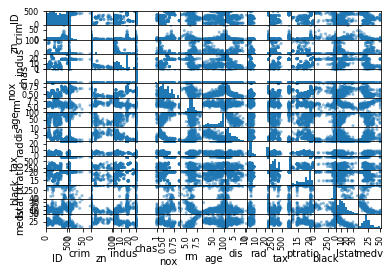

In [21]:
pd.plotting.scatter_matrix(bhd)
plt.show() #just confusing and hard to read

In [41]:
bhd.crim.describe()

count    333.000000
mean       3.360341
std        7.352272
min        0.006320
25%        0.078960
50%        0.261690
75%        3.678220
max       73.534100
Name: crim, dtype: float64

highly skewed data set, outliers go out to 73 but 75% of data below 3.6. 

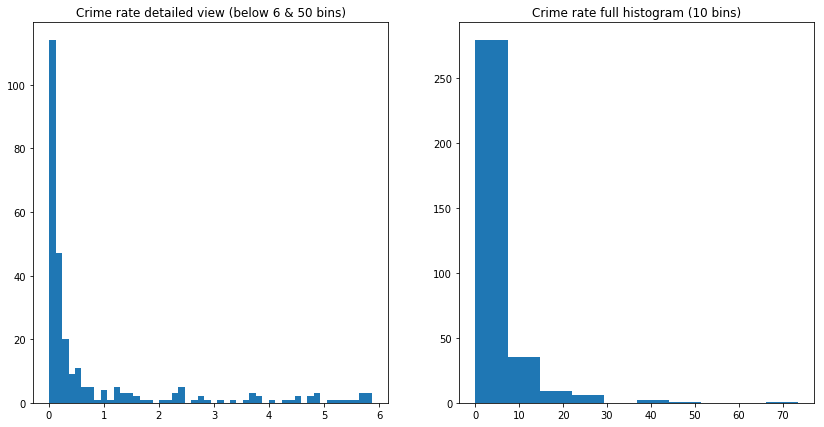

In [59]:
bhdcrimfig=plt.figure(figsize=(14,7))
ax1= bhdcrimfig.add_subplot(121)      
ax1.hist(bhd.crim[bhd.crim<6],bins =50)
ax1.set_title('Crime rate detailed view (below 6 & 50 bins)')
ax2=bhdcrimfig.add_subplot(122)
ax2.hist(bhd.crim)
ax2.set_title('Crime rate full histogram (10 bins)')
plt.show()

split dataset by crime rate above and below 1

In [57]:
bhdlowcrim=bhd.loc[bhd.crim<1]
bhdhighcrim=bhd.loc[bhd.crim>=1]
print('low crime:\n',bhdlowcrim.describe(),'\n','highcrime\n',bhdhighcrim.describe())

low crime:
                ID        crim          zn       indus        chas         nox  \
count  215.000000  215.000000  215.000000  215.000000  215.000000  215.000000   
mean   195.451163    0.190162   16.555814    7.694093    0.051163    0.492293   
std    123.368365    0.207554   26.458734    5.986247    0.220844    0.065747   
min      1.000000    0.006320    0.000000    0.740000    0.000000    0.385000   
25%     87.500000    0.053370    0.000000    3.970000    0.000000    0.437000   
50%    194.000000    0.111320    0.000000    6.090000    0.000000    0.489000   
75%    284.500000    0.235360   22.000000    9.900000    0.000000    0.538000   
max    506.000000    0.988430  100.000000   27.740000    1.000000    0.647000   

               rm         age         dis         rad         tax     ptratio  \
count  215.000000  215.000000  215.000000  215.000000  215.000000  215.000000   
mean     6.438981   56.492093    4.545132    4.441860  307.902326   18.000465   
std      0.6388

In [61]:
print('low crime:\n',bhdlowcrim.medv.describe(),'\n','highcrime\n',bhdhighcrim.medv.describe())

low crime:
 count    215.000000
mean      25.290233
std        7.937310
min        8.100000
25%       19.950000
50%       23.300000
75%       29.050000
max       50.000000
Name: medv, dtype: float64 
 highcrime
 count    118.000000
mean      18.174576
std        9.517839
min        5.000000
25%       12.700000
50%       16.200000
75%       21.400000
max       50.000000
Name: medv, dtype: float64


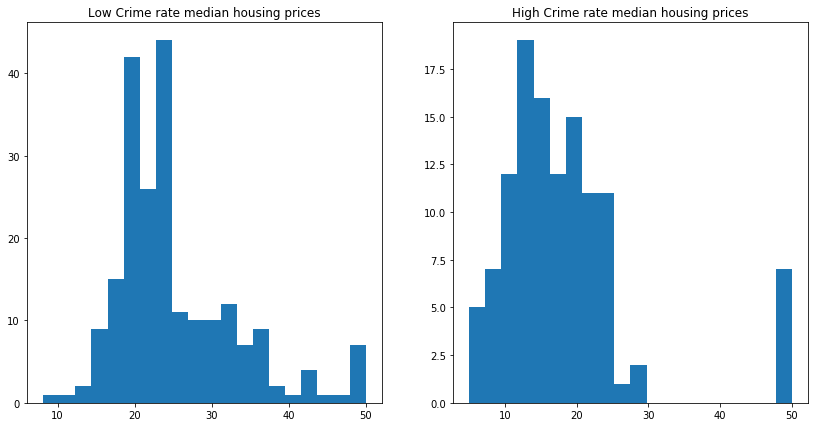

In [67]:
bhdcrimmedv=plt.figure(figsize=(14,7))
ax1= bhdcrimmedv.add_subplot(121)      
ax1.hist(bhdlowcrim.medv,bins =20)
ax1.set_title('Low Crime rate median housing prices')
ax2=bhdcrimmedv.add_subplot(122)
ax2.hist(bhdhighcrim.medv,bins=20)
ax2.set_title('High Crime rate median housing prices')
plt.show()

In [68]:
bhdhighcrim[bhdhighcrim.medv>30] #outliers

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
109,162,1.46336,0.0,19.58,0,0.605,7.489,90.8,1.9709,5,403,14.7,374.43,1.73,50.0
110,164,1.51902,0.0,19.58,1,0.605,8.375,93.9,2.1620,5,403,14.7,388.45,3.32,50.0
113,167,2.01019,0.0,19.58,0,0.605,7.929,96.2,2.0459,5,403,14.7,369.30,3.70,50.0
243,369,4.89822,0.0,18.10,0,0.631,4.970,100.0,1.3325,24,666,20.2,375.52,3.26,50.0
244,371,6.53876,0.0,18.10,1,0.631,7.016,97.5,1.2024,24,666,20.2,392.05,2.96,50.0
245,372,9.23230,0.0,18.10,0,0.631,6.216,100.0,1.1691,24,666,20.2,366.15,9.53,50.0
246,373,8.26725,0.0,18.10,1,0.668,5.875,89.6,1.1296,24,666,20.2,347.88,8.88,50.0


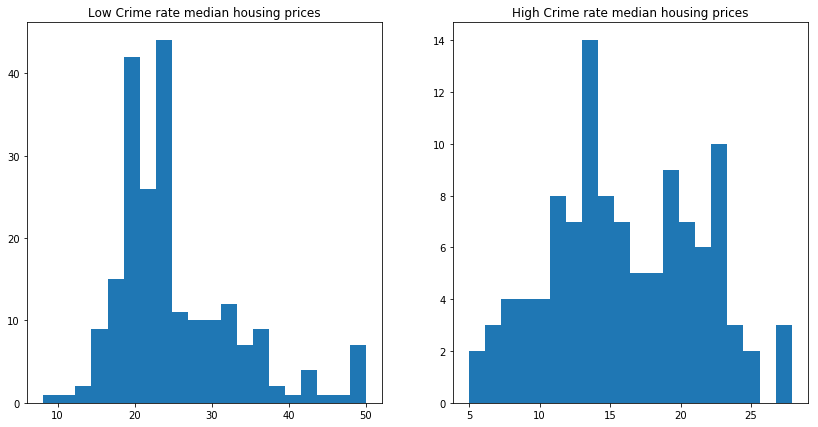

In [74]:
bhdcrimmedv=plt.figure(figsize=(14,7))
ax1= bhdcrimmedv.add_subplot(121)      
ax1.hist(bhdlowcrim.medv,bins =20)
ax1.set_title('Low Crime rate median housing prices')
ax2=bhdcrimmedv.add_subplot(122)
ax2.hist(bhdhighcrim[bhdhighcrim.medv<40]['medv'],bins=20)
ax2.set_title('High Crime rate median housing prices')
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001711C898278>,
      dtype=object)

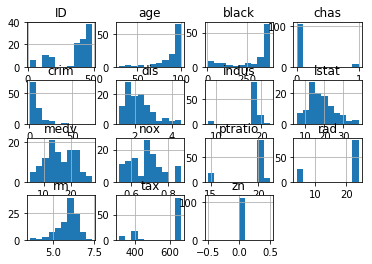

In [72]:
bhdhighcrim[bhdhighcrim.medv<40].hist()
